# EDA

En esta Jupyter Notebook se realiza el Análisis Exploratorio de los datos de los tres conjuntos de datos ya limpios para finalmente elegir las variables que serán usadas para entrenar el modelo de recomendación solicitado. Esto se hace dado que es un gran volumen de información y los recursos de procesamiento y almacenamiento, sobretodo al momento de deployar el proyecto, son limitados.

## Importaciones

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2
import utils

import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## EDA del dataset  `user_reviews`

En esta sección se desarrolla el Análisis Exploratorio de los Datos del conjunto `user_reviews` que ya pasó por el proceso de ETL.

### Lectura del conjunto de datos

Se leen los datos de .csv y se guarda en un dataframe.

In [57]:
df_reviews = pd.read_parquet(r'C:\Users\melan\Desktop\DATA SCIENCE- Henry\PI1_MLOps_videojuegos\Data_cleaned\df_reviews_unido.parquet')
df_reviews.head()

,user_id,user_url,reviews_item_id,reviews_helpful,reviews_recommend,reviews_date,sentiment_analysis,release_anio
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1250,No ratings yet,True,2011-11-05,1,2009
1,EndAtHallow,http://steamcommunity.com/id/EndAtHallow,1250,No ratings yet,True,2015-01-15,1,2009
2,76561198077432581,http://steamcommunity.com/profiles/76561198077...,1250,No ratings yet,True,2014-12-12,1,2009
3,76561198057958244,http://steamcommunity.com/profiles/76561198057...,1250,0 of 1 people (0%) found this review helpful,True,2013-12-13,0,2009
4,46366536564574576346346546,http://steamcommunity.com/id/46366536564574576...,1250,2 of 3 people (67%) found this review helpful,True,2014-08-19,1,2009


Se revisan los tipos de datos y cantidad de nulos si hay.

In [58]:
def verificar_tipo_datos(df):
    '''
    Realiza un análisis de los tipos de datos y la presencia de valores nulos en un DataFrame.

    Esta función toma un DataFrame como entrada y devuelve un resumen que incluye información sobre
    los tipos de datos en cada columna, el porcentaje de valores no nulos y nulos, así como la
    cantidad de valores nulos por columna.

    Parameters:

        df (pandas.DataFrame): El DataFrame que se va a analizar.

    Returns:
        pandas.DataFrame: Un DataFrame que contiene el resumen de cada columna, incluyendo:
        - 'nombre_campo': Nombre de cada columna.
        - 'tipo_datos': Tipos de datos únicos presentes en cada columna.
        - 'no_nulos_%': Porcentaje de valores no nulos en cada columna.
        - 'nulos_%': Porcentaje de valores nulos en cada columna.
        - 'nulos': Cantidad de valores nulos en cada columna.
    '''

    mi_dict = {"nombre_campo": [], "tipo_datos": [], "no_nulos_%": [], "nulos_%": [], "nulos": []}

    for columna in df.columns:
        porcentaje_no_nulos = (df[columna].count() / len(df)) * 100
        mi_dict["nombre_campo"].append(columna)
        mi_dict["tipo_datos"].append(df[columna].apply(type).unique())
        mi_dict["no_nulos_%"].append(round(porcentaje_no_nulos, 2))
        mi_dict["nulos_%"].append(round(100-porcentaje_no_nulos, 2))
        mi_dict["nulos"].append(df[columna].isnull().sum())

    df_reviews= pd.DataFrame(mi_dict)
        
    return df_reviews

In [59]:
# Se calcula la cantidad de registros
print(f'La cantidad de registros que hay son: {df_reviews.shape[0]}')
# Se revisan tipos de datos y existencias de nulos
verificar_tipo_datos(df_reviews)

La cantidad de registros que hay son: 48695


,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,user_id,[<class 'str'>],100.0,0.0,0
1,user_url,[<class 'str'>],100.0,0.0,0
2,reviews_item_id,[<class 'str'>],100.0,0.0,0
3,reviews_helpful,[<class 'str'>],100.0,0.0,0
4,reviews_recommend,[<class 'bool'>],100.0,0.0,0
5,reviews_date,[<class 'str'>],100.0,0.0,0
6,sentiment_analysis,[<class 'int'>],100.0,0.0,0
7,release_anio,[<class 'str'>],100.0,0.0,0


Se tienen 57397 registros de opiniones de los usuarios respecto a los juegos que consumen. Si bien no hay nulos, hay que recordar que en el ETL se observaron datos faltantes en la columna 'reviews_date' donde se rellenó con 'Formato inválido'.

### Columnas 'sentiment_analysis' y 'reviews_recommend'

Se exploran las columnas 'sentiment_analysis' y 'reviews_recommend'.

In [60]:
def resumen_cant_porcentaje(df, columna):
    '''
    Cuanta la cantidad de True/False luego calcula el porcentaje.

    Parameters:
    - df (DataFrame): El DataFrame que contiene los datos.
    - columna (str): El nombre de la columna en el DataFrame para la cual se desea generar el resumen.

    Returns:
    DataFrame: Un DataFrame que resume la cantidad y el porcentaje de True/False en la columna especificada.
    '''
    # Cuanta la cantidad de True/False luego calcula el porcentaje
    counts = df[columna].value_counts()
    percentages = round(100 * counts / len(df),2)
    # Crea un dataframe con el resumen
    df_reviews = pd.DataFrame({
        "Cantidad": counts,
        "Porcentaje": percentages
    })
    return df_reviews

In [61]:
resumen_cant_porcentaje(df_reviews, 'sentiment_analysis')

,Cantidad,Porcentaje
sentiment_analysis,,
1,29903,61.41
2,14599,29.98
0,4193,8.61


In [62]:
resumen_cant_porcentaje(df_reviews, 'reviews_recommend')

,Cantidad,Porcentaje
reviews_recommend,,
True,43493,89.32
False,5202,10.68


De los registros de reviews casi el 62% de los reviews reflejan sentimientos neutrales, casi el 30% reflejan sentimientos positivos hacia el juego y menos del 9% fue negativo. Pero en el 88% de los reviews se recomiendan los juegos que consumen.

En el siguiente código se busca ver la cantidad de recomendaciones para los distintos sentimientos de las reviews.

In [63]:
# Se agrupa por 'sentiment_analysis' y 'reviews_recommend'
df_agrupado = df_reviews.groupby(['sentiment_analysis', 'reviews_recommend'])
# Se cuentan la cantidad de reviews en cada grupo
cantidad_grupo = df_agrupado.size()
# Se calcula el porcentaje por cada grupo
porcentaje_grupo = 100 * df_agrupado.size() / len(df_reviews)
# Se crea un datafram con el resumen
sentimiento_recomendacion = pd.DataFrame({
    "Cantidad": cantidad_grupo,
    "Porcentaje": porcentaje_grupo
})
sentimiento_recomendacion

Cantidad  Porcentaje
sentiment_analysis reviews_recommend                      
0                  False                  1326    2.723072
                   True                   2867    5.887668
1                  False                  3420    7.023308
                   True                  26483   54.385461
2                  False                   456    0.936441
                   True                  14143   29.044050

Se puede ver que el porcentaje respecto del total de los reviews que casi el 54% de los reviews que reflejan un sentimiento neutral recomienda el juego por lo que un sentimiento neutral podría estar relacionado con un comentario sencillo sin muchos detalles pero que aún así el juego le gustó como para recomendar. Por otra parte, de los comentarios que reflejaron un sentimiento negativo cerca del 6% aún recomienda el juego, lo que es algo contradictorio.

In [64]:
# Cantidad de usuarios que dieron su opinion
print(f"Cantidad de usuarios únicos que opinaron: {len(df_reviews['user_id'].unique())}")

Cantidad de usuarios únicos que opinaron: 22951


Un total de 22951 usurarios dieron su opinión sobre el juego que consumen, con lo que un usuario hizo mas de un comentario.

### Columna 'reviews_date'

Se revisan la cantidad de fechas con formato inválido o que no tenían fecha en el conjunto de datos original.

In [65]:
print(f'La cantidad de fechas en formato inválido son: {len(df_reviews[df_reviews["reviews_date"]=="Formato inválido"])}')

La cantidad de fechas en formato inválido son: 8443


Hay 8443registros que no contienen la fecha del review.

En el siguiente gráfico se puede ver la distribución de la cantidad de reviews por día, sin tener en cuenta los que no tenía la fecha.

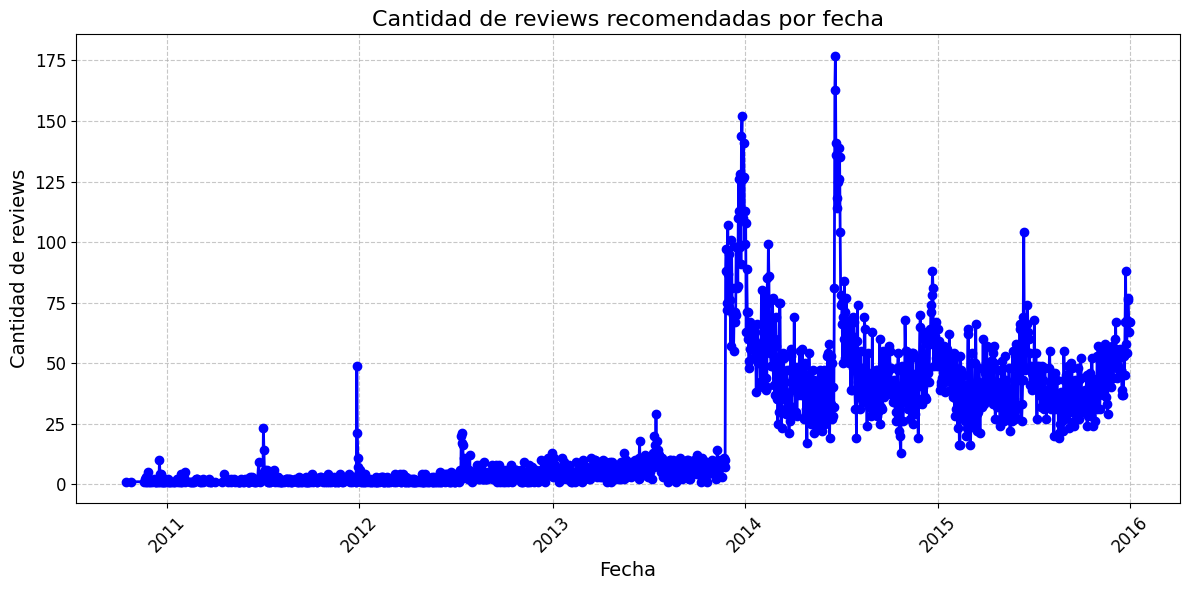

In [66]:
# Se hace un dataframe auxiliar para analizar solo las fechas (hay campos con 'Datos no disponibles')
df = df_reviews[df_reviews["reviews_date"].str.match(r"^\d{4}-\d{2}-\d{2}$")]
# Convierte a formato fecha
df["reviews_date"] = pd.to_datetime(df["reviews_date"])
# Calcula la cantidad de review por fecha
df_counts = df.groupby("reviews_date").count()

# Grafica
plt.figure(figsize=(12, 6))
plt.plot(df_counts.index, df_counts["reviews_recommend"], marker='o', linestyle='-', color='blue', linewidth=2)
plt.title('Cantidad de reviews recomendadas por fecha', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad de reviews', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [67]:
print('Días de cantidad pico de reviews')
df_counts.sort_values(by='reviews_recommend', ascending=False)['reviews_recommend'][:5]

Días de cantidad pico de reviews


reviews_date
2014-06-21    177
2014-06-20    163
2013-12-26    152
2013-12-25    144
2014-06-23    141
Name: reviews_recommend, dtype: int64

Se observa que hasta cerca del 2014 la cantidad de reviews por día es bajo, con algunos picos puntuales y luego aumenta considerablemente la cantidad de comentarios con un pico máximo el 21-06-2014 con 218 comentarios en un solo día.

## EDA del dataset  `steam_games`

En esta sección se desarrolla el Análisis Exploratorio de los Datos del conjunto `steam_games` que ya pasó por el proceso de ETL.

### Lectura del conjunto de datos

Se leen los datos de .csv y se guarda en un dataframe.

In [68]:
df_games = pd.read_parquet(r'C:\Users\melan\Desktop\DATA SCIENCE- Henry\PI1_MLOps_videojuegos\Data_cleaned\ETL-Steam_game_cleaned.parquet')
df_games.head()

,genres,price,early_access,id,release_anio,publisher,app_name,title,developer
0,Action,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
1,Casual,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
2,Indie,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
3,Simulation,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
4,Strategy,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro


Se revisan los tipos de datos y cantidad de nulos si hay.

In [69]:
def verificar_tipo_datos(df):
    '''
    Realiza un análisis de los tipos de datos y la presencia de valores nulos en un DataFrame.

    Esta función toma un DataFrame como entrada y devuelve un resumen que incluye información sobre
    los tipos de datos en cada columna, el porcentaje de valores no nulos y nulos, así como la
    cantidad de valores nulos por columna.

    Parameters:

        df (pandas.DataFrame): El DataFrame que se va a analizar.

    Returns:
        pandas.DataFrame: Un DataFrame que contiene el resumen de cada columna, incluyendo:
        - 'nombre_campo': Nombre de cada columna.
        - 'tipo_datos': Tipos de datos únicos presentes en cada columna.
        - 'no_nulos_%': Porcentaje de valores no nulos en cada columna.
        - 'nulos_%': Porcentaje de valores nulos en cada columna.
        - 'nulos': Cantidad de valores nulos en cada columna.
    '''

    mi_dict = {"nombre_campo": [], "tipo_datos": [], "no_nulos_%": [], "nulos_%": [], "nulos": []}

    for columna in df.columns:
        porcentaje_no_nulos = (df[columna].count() / len(df)) * 100
        mi_dict["nombre_campo"].append(columna)
        mi_dict["tipo_datos"].append(df[columna].apply(type).unique())
        mi_dict["no_nulos_%"].append(round(porcentaje_no_nulos, 2))
        mi_dict["nulos_%"].append(round(100-porcentaje_no_nulos, 2))
        mi_dict["nulos"].append(df[columna].isnull().sum())

    df_games = pd.DataFrame(mi_dict)
        
    return df_games

In [70]:
# Se calcula la cantidad de registros
print(f'La cantidad de registros que hay son: {df_games.shape[0]}')
# Se revisan tipos de datos y existencias de nulos
verificar_tipo_datos(df_games)

La cantidad de registros que hay son: 71548


,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,genres,[<class 'str'>],100.0,0.0,0
1,price,[<class 'float'>],100.0,0.0,0
2,early_access,[<class 'bool'>],100.0,0.0,0
3,id,[<class 'str'>],100.0,0.0,0
4,release_anio,[<class 'str'>],100.0,0.0,0
5,publisher,[<class 'str'>],100.0,0.0,0
6,app_name,[<class 'str'>],100.0,0.0,0
7,title,[<class 'str'>],100.0,0.0,0
8,developer,[<class 'str'>],100.0,0.0,0


Este conjunto de datos tiene 9 columnas y 71551 registros. Para recordar, contiene la información relacionada a cada juego como el precio, el año de lanzamiento, el nombre de la aplicación y del juego, el desarrollador y el publicitador, así como el género. Hay que tener en cuenta que la información se repite porque un juego puede pertenecer a mas de un género.

### Columnas 'id', 'app_name' y 'title'

Estas columnas hacen referencia al identificador único del juego y los nombres de la aplicación y del título del juego. Estos últimos no tienen mayor información que analizar en este momento. Con el 'id' se puede calcular la cantidad de juegos.

In [71]:
total_juegos = len(df_games['id'].unique())
print(f"El total de juegos que hay registrados son: {total_juegos}")

El total de juegos que hay registrados son: 28848


Hay un total de 28848 juegos en la plataforma.

### Columna 'genres'

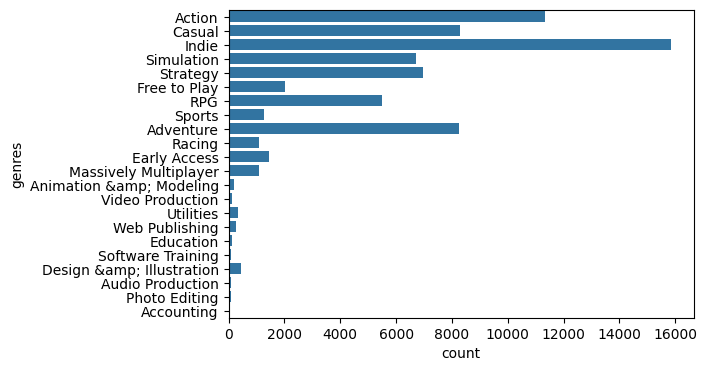

In [72]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_games, y='genres', orient='h')
plt.show()

In [73]:
def resumen_cant_porcentaje(df, columna):
    '''
    Cuanta la cantidad de True/False luego calcula el porcentaje.

    Parameters:
    - df (DataFrame): El DataFrame que contiene los datos.
    - columna (str): El nombre de la columna en el DataFrame para la cual se desea generar el resumen.

    Returns:
    DataFrame: Un DataFrame que resume la cantidad y el porcentaje de True/False en la columna especificada.
    '''
    # Cuanta la cantidad de True/False luego calcula el porcentaje
    counts = df[columna].value_counts()
    percentages = round(100 * counts / len(df),2)
    # Crea un dataframe con el resumen
    df_games = pd.DataFrame({
        "Cantidad": counts,
        "Porcentaje": percentages
    })
    return df_games

In [74]:
resumen_cant_porcentaje(df_games, 'genres')

,Cantidad,Porcentaje
genres,,
Indie,15858,22.16
Action,11318,15.82
Casual,8282,11.58
Adventure,8240,11.52
Strategy,6957,9.72
Simulation,6699,9.36
RPG,5479,7.66
Free to Play,2031,2.84
Early Access,1462,2.04


Los juegos estan categorizados mayormente en las categorías *Indi*, *Action*, *Casual* y *Adventure*. Cabe recordar que un juego puede tener mas de un género asociado.

### Columna 'release_anio'

In [75]:
def resumen_cant_porcentaje(df, columna):
    '''
    Cuanta la cantidad de True/False luego calcula el porcentaje.

    Parameters:
    - df (DataFrame): El DataFrame que contiene los datos.
    - columna (str): El nombre de la columna en el DataFrame para la cual se desea generar el resumen.

    Returns:
    DataFrame: Un DataFrame que resume la cantidad y el porcentaje de True/False en la columna especificada.
    '''
    # Cuanta la cantidad de True/False luego calcula el porcentaje
    counts = df[columna].value_counts()
    percentages = round(100 * counts / len(df),2)
    # Crea un dataframe con el resumen
    df_games = pd.DataFrame({
        "Cantidad": counts,
        "Porcentaje": percentages
    })
    return df_games

In [76]:
resumen_cant_porcentaje(df_games, 'release_anio')[:10]

,Cantidad,Porcentaje
release_anio,,
2017,24968,34.90
2016,17667,24.69
2015,12256,17.13
2014,6341,8.86
2013,3016,4.22
2012,2104,2.94
2011,986,1.38
Dato no disponible,850,1.19
2010,651,0.91


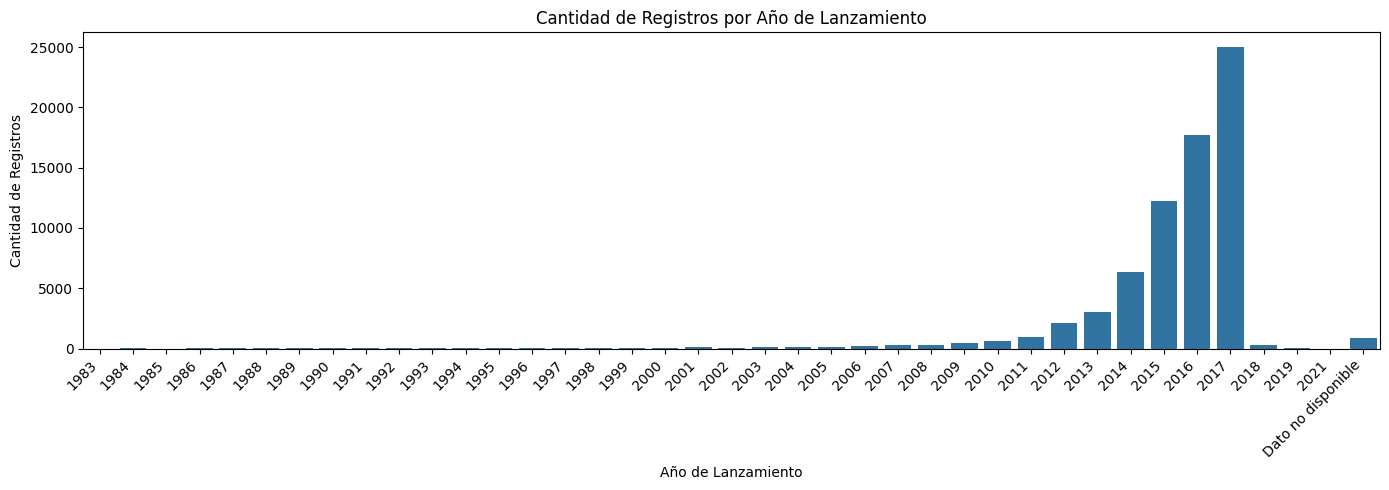

In [77]:
# Cuenta la frecuencia de cada año
conteo_anios = df_games['release_anio'].value_counts()

# Ordena los valores para que 'Datos no disponibles' queden al principio o al final
conteo_anios = conteo_anios.reindex(['Dato no disponible'] + list(conteo_anios.index))
# Ordena los valores por año
conteo_anios = conteo_anios.sort_index()

# Crear la gráfica de barras
plt.figure(figsize=(14, 5))
sns.barplot(x=conteo_anios.index, y=conteo_anios.values)
plt.xlabel('Año de Lanzamiento') ; plt.ylabel('Cantidad de Registros') ; plt.title('Cantidad de Registros por Año de Lanzamiento')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [78]:
# Filtra los registros con valores numéricos en la columna 'release_anio'
registros_numericos = df_games[df_games['release_anio'].str.isnumeric()]
# Convierte la columna 'release_anio' a valores enteros
registros_numericos['release_anio'] = registros_numericos['release_anio'].astype(int)
# Filtra los registros con años de lanzamiento antes de 2002
registros_antes_2002 = registros_numericos[registros_numericos['release_anio'] < 2002]

print(f"Cantidad de registros antes de 2002: {len(registros_antes_2002)}")
print(f"Cantidad de registros 'Dato no disponible': {df_games[df_games['release_anio'] == 'Dato no disponible'].shape[0]}")

Cantidad de registros antes de 2002: 679
Cantidad de registros 'Dato no disponible': 850


Se pueden ver 679 juegos lanzados en años anteriores al 2002 lo que puede ser un error porque la plataforma se lanzó en el 2003. Por otra parte, se observan 850 juegos sin la fecha disponible debido a que no estaba especificada o estaba en un formato incorrecto. Luego se ve el crecimiento constante y lento hasta 2012 y luego crece mas rápidamente hasta 2017. A partir de allí, la plataforma limitó la forma de obtener las estadísticas, por eso se ven muchos menos registros.

### Columnas 'publisher' y 'developer'

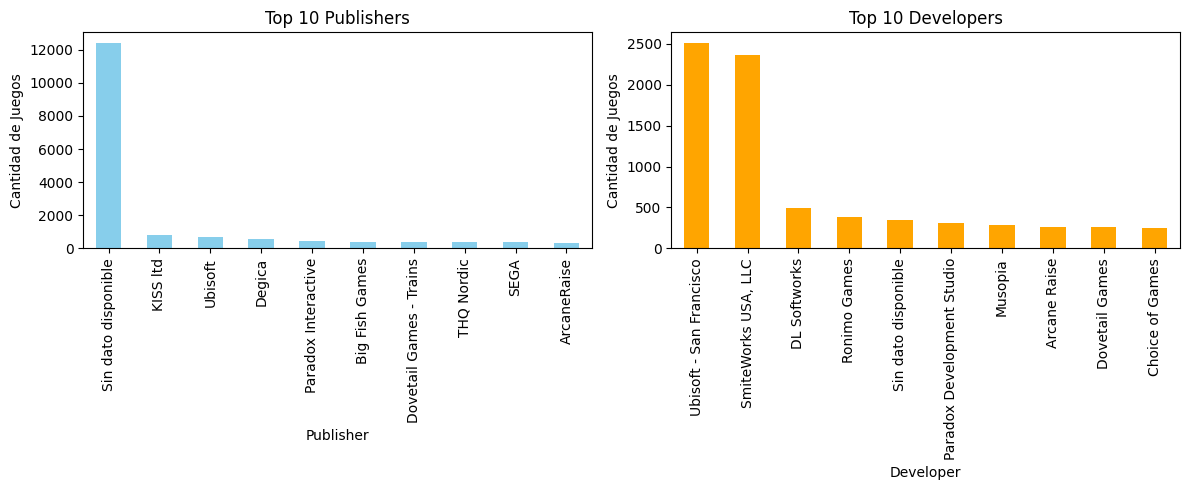

In [79]:
# Contar la cantidad de juegos por publisher
conteo_publisher = df_games['publisher'].value_counts()

# Contar la cantidad de juegos por developer
conteo_developer = df_games['developer'].value_counts()

# Crear una figura con dos subplots uno al lado del otro
plt.figure(figsize=(12, 5))

# Primer subplot para los publishers
plt.subplot(1, 2, 1)
conteo_publisher[:10].plot(kind='bar', color='skyblue')
plt.xlabel('Publisher') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 10 Publishers')

# Segundo subplot para los developers
plt.subplot(1, 2, 2)
conteo_developer[:10].plot(kind='bar', color='orange')
plt.xlabel('Developer') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 10 Developers')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

En el caso de los publicista de juegos, la mayor cantidad no dispone del dato y en el caso de los desarrolladores, Ubisoft y SmiteWorks son los desarrolladores que mas juegos han desarrollado para la plataforma.

## EDA del dataset  `users_items`

En esta sección se desarrolla el Análisis Exploratorio de los Datos del conjunto `users_items`  que ya pasó por el proceso de ETL.

### Lectura del conjunto de datos

Se leen los datos de .csv y se guarda en un dataframe.

In [80]:
df_items = pd.read_parquet(r'C:\Users\melan\Desktop\DATA SCIENCE- Henry\PI1_MLOps_videojuegos\Data_cleaned\ETL-User_itmes_cleaned.parquet')
df_items.head()

,item_id,item_name,playtime_forever,steam_id,items_count,user_id,user_url
0,10,Counter-Strike,6,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,20,Team Fortress Classic,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
2,30,Day of Defeat,7,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
3,40,Deathmatch Classic,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
4,50,Half-Life: Opposing Force,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...


Se revisan los tipos de datos y cantidad de nulos si hay.

In [81]:
def verificar_tipo_datos(df):
    '''
    Realiza un análisis de los tipos de datos y la presencia de valores nulos en un DataFrame.

    Esta función toma un DataFrame como entrada y devuelve un resumen que incluye información sobre
    los tipos de datos en cada columna, el porcentaje de valores no nulos y nulos, así como la
    cantidad de valores nulos por columna.

    Parameters:

        df (pandas.DataFrame): El DataFrame que se va a analizar.

    Returns:
        pandas.DataFrame: Un DataFrame que contiene el resumen de cada columna, incluyendo:
        - 'nombre_campo': Nombre de cada columna.
        - 'tipo_datos': Tipos de datos únicos presentes en cada columna.
        - 'no_nulos_%': Porcentaje de valores no nulos en cada columna.
        - 'nulos_%': Porcentaje de valores nulos en cada columna.
        - 'nulos': Cantidad de valores nulos en cada columna.
    '''

    mi_dict = {"nombre_campo": [], "tipo_datos": [], "no_nulos_%": [], "nulos_%": [], "nulos": []}

    for columna in df.columns:
        porcentaje_no_nulos = (df[columna].count() / len(df)) * 100
        mi_dict["nombre_campo"].append(columna)
        mi_dict["tipo_datos"].append(df[columna].apply(type).unique())
        mi_dict["no_nulos_%"].append(round(porcentaje_no_nulos, 2))
        mi_dict["nulos_%"].append(round(100-porcentaje_no_nulos, 2))
        mi_dict["nulos"].append(df[columna].isnull().sum())

    df_items = pd.DataFrame(mi_dict)
        
    return df_items

In [82]:
# Se calcula la cantidad de registros
print(f'La cantidad de registros que hay son: {df_items.shape[0]}')
# Se revisan tipos de datos y existencias de nulos
verificar_tipo_datos(df_items)

La cantidad de registros que hay son: 5094105


,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,item_id,[<class 'str'>],100.0,0.0,0
1,item_name,[<class 'str'>],100.0,0.0,0
2,playtime_forever,[<class 'int'>],100.0,0.0,0
3,steam_id,[<class 'str'>],100.0,0.0,0
4,items_count,[<class 'int'>],100.0,0.0,0
5,user_id,[<class 'str'>],100.0,0.0,0
6,user_url,[<class 'str'>],100.0,0.0,0


Este conjunto de datos tiene 7 columnas y 5094105 registros. Para recordar, contiene la información relacionada los usuarios y los juegos que consumen como el tiempo acumulado (en minutos) que han jugado a un juego, la cantidad de items que consumen así como los identificadores de los juegos que consumen y del propio usuario y la url del perfil del mismo.

### Columna 'playtime_forever'

Estas columnas hacen referencia al tiempo en minutos acumulados que un usuario ha jugado.

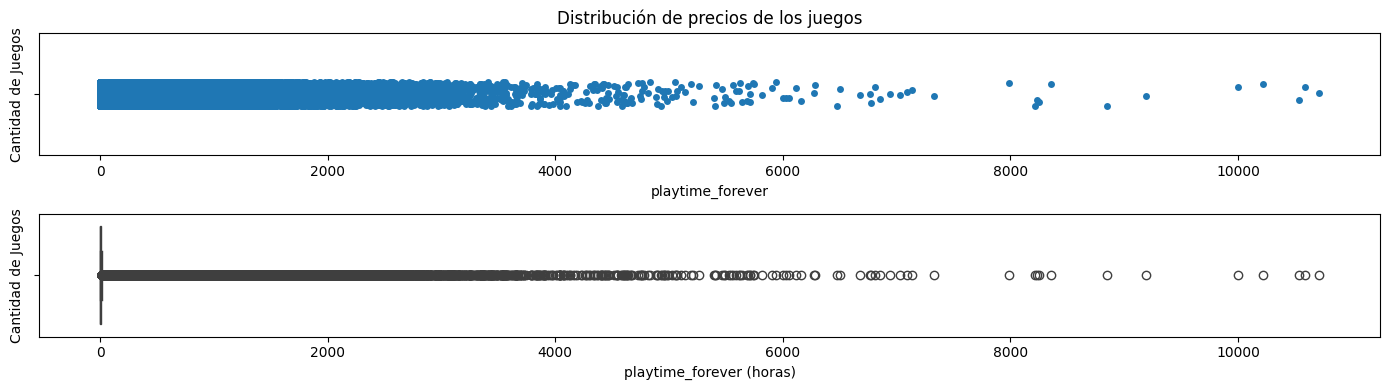

In [83]:
df_items['playtime_hours'] = df_items['playtime_forever'] / 60

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=df_items, x='playtime_hours', ax=ax1)
ax1.set_xlabel('playtime_forever') ; ax1.set_ylabel('Cantidad de Juegos') ; ax1.set_title('Distribución de precios de los juegos')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=df_items, x='playtime_hours', ax=ax2)
ax2.set_xlabel('playtime_forever (horas)') ; ax2.set_ylabel('Cantidad de Juegos')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

In [84]:
def bigote_max(columna):
    '''
    Calcula el valor del bigote superior y la cantidad de valores atípicos en una columna.

    Parameters:
    - columna (pandas.Series): La columna de datos para la cual se desea calcular el bigote superior y encontrar valores atípicos.

    Returns:
    None
    '''
    # Cuartiles
    q1 = columna.describe()[4]
    q3 = columna.describe()[6]

    # Valor del vigote
    bigote_max = round(q3 + 1.5*(q3 - q1), 2)
    print(f'El bigote superior de la variable {columna.name} se ubica en:', bigote_max)

    # Cantidad de atípicos
    print(f'Hay {(columna > bigote_max).sum()} valores atípicos en la variable {columna.name}')


In [85]:
estadisticas = df_items['playtime_hours'].describe()
print(f'El precio medio (mediana) de los juegos es de: {round(estadisticas[5],2)}')
print(f'El precio promedio (mean) de los juegos es de: {round(estadisticas[1],2)}')
print(f'El 75% de los juegos tienen un precio menor de: {round(estadisticas[6],2)}')
bigote_max(df_items['playtime_hours'])

El precio medio (mediana) de los juegos es de: 0.57
El precio promedio (mean) de los juegos es de: 16.51
El 75% de los juegos tienen un precio menor de: 5.92
El bigote superior de la variable playtime_hours se ubica en: 14.79
Hay 763606 valores atípicos en la variable playtime_hours


Se puede observar que cada usuario, por juego, pasa un tiempo medio de 0.57 hs jugando y el 75% de los jugadores estuvieron menos de 6 hs jugando a un juego, pero se observa una gran cantidad de valores atípicos por encima de las 14.79 hs que juega cada usuario a un juego. Esto podría deberse al uso de bots que utilizan el mismo perfil de usuario para jugar en simultaneo, lo que generaría una distorsión de los tiempos reales de juego.

### Columna 'items_count'

Esta columna indica la cantidad de juegos que consumen o compraron alguna vez los usuarios.

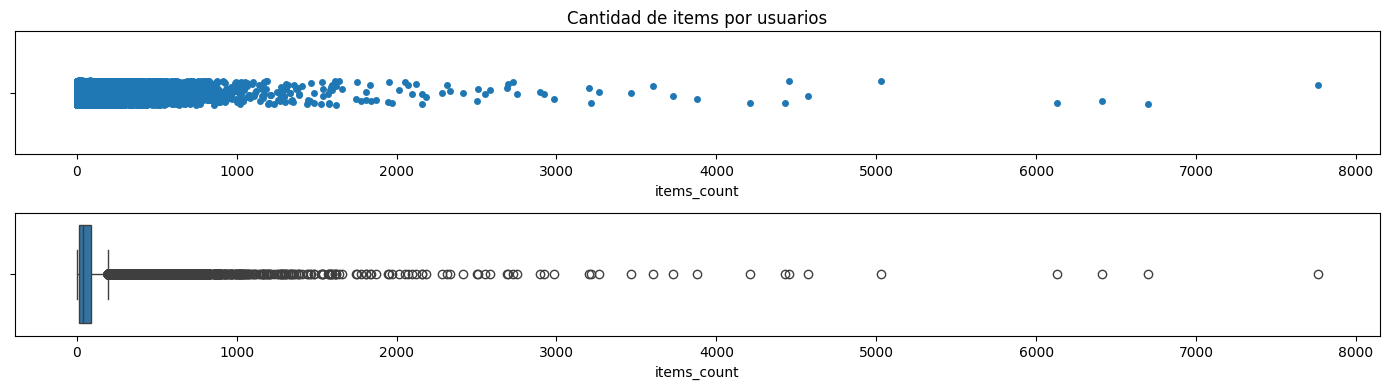

In [86]:
# Agrupa por usuario la cantidad de items, lo conviente en data frame y los ordena de mayor a menor
items_count_user = df_items.groupby('user_id')['items_count'].unique().explode()
items_count_user = pd.DataFrame(items_count_user)
items_count_user_o = items_count_user.sort_values('items_count', ascending=False)

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=items_count_user_o, x='items_count', ax=ax1)
ax1.set_xlabel('items_count') ; ax1.set_title('Cantidad de items por usuarios')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=items_count_user_o, x='items_count', ax=ax2)
ax2.set_xlabel('items_count')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

In [87]:
def bigote_max(columna):
    '''
    Calcula el valor del bigote superior y la cantidad de valores atípicos en una columna.

    Parameters:
    - columna (pandas.Series): La columna de datos para la cual se desea calcular el bigote superior y encontrar valores atípicos.

    Returns:
    None
    '''
    # Cuartiles
    q1 = columna.describe()[4]
    q3 = columna.describe()[6]

    # Valor del vigote
    bigote_max = round(q3 + 1.5*(q3 - q1), 2)
    print(f'El bigote superior de la variable {columna.name} se ubica en:', bigote_max)

    # Cantidad de atípicos
    print(f'Hay {(columna > bigote_max).sum()} valores atípicos en la variable {columna.name}')

In [88]:
estadisticas = items_count_user['items_count'].astype(float).describe()
print(f'El precio medio (mediana) de los juegos es de: {round(estadisticas[5],2)}')
print(f'El precio promedio (mean) de los juegos es de: {round(estadisticas[1],2)}')
print(f'El 75% de los juegos tienen un precio menor de: {round(estadisticas[6],2)}')
bigote_max(items_count_user.astype(float)['items_count'])

El precio medio (mediana) de los juegos es de: 40.0
El precio promedio (mean) de los juegos es de: 71.84
El 75% de los juegos tienen un precio menor de: 87.0
El bigote superior de la variable items_count se ubica en: 196.5
Hay 4957 valores atípicos en la variable items_count


<Figure size 1400x500 with 0 Axes>

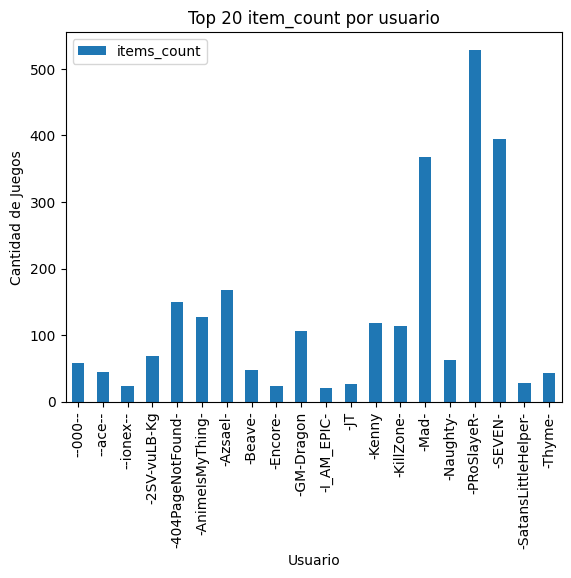

In [89]:
# Grafica cantidad de item por usuarios
plt.figure(figsize=(14, 5))
items_count_user[:20].plot(kind='bar')
plt.xlabel('Usuario') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 20 item_count por usuario')
plt.show()

Se puede ver que el usuario que mas cantidad de juegos a consumido ronda los 8000 juegos, pero el 75% de los usuarios ha adquirido menos de 87 items. Se pueden ver 4957 usuarios que hay adquirido mas de 196 items que podrían considerarse como atípicos.

## Elección de las variables a usar en el modelo de recomendación

Para el modelo de recomndación se busca como resultado la recomendación un una lista de 5 juegos a partir de indicar el nombre de un juego o el id de un usuario, basado en un puntaje que se debe decidir cómo crearlo. Para ello, se revisan los dataframe df_reviews y df_items analizados anteriormente.

In [96]:
df_reviews = pd.read_parquet(r'C:\Users\melan\Desktop\DATA SCIENCE- Henry\PI1_MLOps_videojuegos\Data_cleaned\df_reviews_unido.parquet')
df_items = pd.read_parquet(r'C:\Users\melan\Desktop\DATA SCIENCE- Henry\PI1_MLOps_videojuegos\Data_cleaned\df_items_unido.parquet')

In [97]:
df_reviews.head(5)

,user_id,user_url,reviews_item_id,reviews_helpful,reviews_recommend,reviews_date,sentiment_analysis,release_anio
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1250,No ratings yet,True,2011-11-05,1,2009
1,EndAtHallow,http://steamcommunity.com/id/EndAtHallow,1250,No ratings yet,True,2015-01-15,1,2009
2,76561198077432581,http://steamcommunity.com/profiles/76561198077...,1250,No ratings yet,True,2014-12-12,1,2009
3,76561198057958244,http://steamcommunity.com/profiles/76561198057...,1250,0 of 1 people (0%) found this review helpful,True,2013-12-13,0,2009
4,46366536564574576346346546,http://steamcommunity.com/id/46366536564574576...,1250,2 of 3 people (67%) found this review helpful,True,2014-08-19,1,2009


In [92]:
df_items.head(5)

,item_id,item_name,playtime_forever,steam_id,items_count,user_id,user_url
0,10,Counter-Strike,6,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,20,Team Fortress Classic,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
2,30,Day of Defeat,7,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
3,40,Deathmatch Classic,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
4,50,Half-Life: Opposing Force,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...


Con los datos disponible, se decide crear un puntaje (rating) para los juegos a partir de considerar el análisis de sentimiento de las reviews para cada juego y las recomendaciones del usuario para ese juego. Recordar que el análisis de sentimiento esta calificado como 0 (sentimiento negativo), 1 (sentimiento neutral) y 2 (sentimiento positivo) y las recomendaciones al juego son True (cuando lo recomienda) y False (cuando no recomienda el juego). Con esta información se busca hacer un puntaje del 1 al 5, siendo el 1 un juego no recomendado que cuentan con reviews con sentimientos negativos y 5 un juego recomendado y con reviews positivos. Se considera esta escala en función de la combinación de las dos variables de esta manera:

* **1** si el análisis de sentimiento es negativo ya sea que este recomendado o no (True o False)
* **2** si el análisis de sentimiento es neutral y no es recomendado (False)
* **3** si el análisis de sentimiento es neutral pero es recomendado (True)
* **4** si el análisis de sentimiento es positivo y no es recomendado (False)
* **5** si el análisis de sentimiento es positivo y es recomendado (True)

Con esto, se arma la siguiente función:

In [98]:
def calcula_rating(row):
    '''
    Calcula una calificación basada en el análisis de sentimientos y la recomendación de review de juegos realizado por los usuarios.

    Parámetros:
    row (dict): Un diccionario que contiene las siguientes claves:
        - "sentiment_analysis" (int): La puntuación del análisis de sentimientos (0, 1 o 2).
        - "reviews_recommend" (bool): Indica si las reseñas recomiendan.

    Devuelve:
        int o None: La calificación calculada como un número entero entre 1 y 5, o None si las entradas son inválidas.
    '''
    if row["sentiment_analysis"] == 0 and not row["reviews_recommend"]:
        return 1
    elif row["sentiment_analysis"] == 0 and row["reviews_recommend"]:
        return 1
    elif row["sentiment_analysis"] == 1 and not row["reviews_recommend"]:
        return 2
    elif row["sentiment_analysis"] == 1 and row["reviews_recommend"]:
        return 3
    elif row["sentiment_analysis"] == 2 and not row["reviews_recommend"]:
        return 4
    elif row["sentiment_analysis"] == 2 and row["reviews_recommend"]:
        return 5
    else:
        return None

Se aplica esta función en una nueva columna sobre el dataframe `df_reviews`

In [99]:
df_reviews['rating'] = df_reviews.apply(calcula_rating, axis=1)
df_reviews.head(2)

,user_id,user_url,reviews_item_id,reviews_helpful,reviews_recommend,reviews_date,sentiment_analysis,release_anio,rating
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1250,No ratings yet,True,2011-11-05,1,2009,3
1,EndAtHallow,http://steamcommunity.com/id/EndAtHallow,1250,No ratings yet,True,2015-01-15,1,2009,3


Se crea un nuevo dataframe dejando solo las columnas 'user_id', 'reviews_item_id' y 'rating' y se reserva.

In [100]:
df1 = df_reviews[['user_id', 'reviews_item_id', 'rating']]
df1.head(2)

,user_id,reviews_item_id,rating
0,76561197970982479,1250,3
1,EndAtHallow,1250,3


Se crea otro datafrma que contenga unicamente los 'item_id' y los nombres de los juego.

In [101]:
df2 = df_items[['item_id', 'item_name']]
# Se borran los dumplicados
df2 = df2.drop_duplicates()
# Cantidad de juegos
print(f'Hay un total de {len(df2)} juegos')
df2.head(2)

Hay un total de 10978 juegos


,item_id,item_name
0,10,Counter-Strike
1,20,Team Fortress Classic


Luego se agregan los nombres de los juegos al primer dataframe.

In [102]:
df = df1.merge(df2, left_on="reviews_item_id", right_on="item_id", how='left')
df

,user_id,reviews_item_id,rating,item_id,item_name
0,76561197970982479,1250,3,1250,Killing Floor
1,EndAtHallow,1250,3,1250,Killing Floor
2,76561198077432581,1250,3,1250,Killing Floor
3,76561198057958244,1250,1,1250,Killing Floor
4,46366536564574576346346546,1250,3,1250,Killing Floor
...,...,...,...,...,...
48690,ButtBurger2,73010,1,73010,Cities in Motion
48691,76561198064526566,378930,2,378930,Pesadelo - Regressão
48692,haungaraho,16600,5,16600,Trials 2: Second Edition
48693,UnseenPrecision,232950,3,232950,Bridge Project


Se pueden observar algunos juegos a los cuales los usuarios les hicieron comentarios, pero que no estan en el dataframe `df_reviews`. Se verifican los tipos de datos y la cantidad de nulos y luego se revisan las filas con nulos.

In [103]:
def verificar_tipo_datos(df):
    '''
    Realiza un análisis de los tipos de datos y la presencia de valores nulos en un DataFrame.

    Esta función toma un DataFrame como entrada y devuelve un resumen que incluye información sobre
    los tipos de datos en cada columna, el porcentaje de valores no nulos y nulos, así como la
    cantidad de valores nulos por columna.

    Parameters:

        df (pandas.DataFrame): El DataFrame que se va a analizar.

    Returns:
        pandas.DataFrame: Un DataFrame que contiene el resumen de cada columna, incluyendo:
        - 'nombre_campo': Nombre de cada columna.
        - 'tipo_datos': Tipos de datos únicos presentes en cada columna.
        - 'no_nulos_%': Porcentaje de valores no nulos en cada columna.
        - 'nulos_%': Porcentaje de valores nulos en cada columna.
        - 'nulos': Cantidad de valores nulos en cada columna.
    '''

    mi_dict = {"nombre_campo": [], "tipo_datos": [], "no_nulos_%": [], "nulos_%": [], "nulos": []}

    for columna in df.columns:
        porcentaje_no_nulos = (df[columna].count() / len(df)) * 100
        mi_dict["nombre_campo"].append(columna)
        mi_dict["tipo_datos"].append(df[columna].apply(type).unique())
        mi_dict["no_nulos_%"].append(round(porcentaje_no_nulos, 2))
        mi_dict["nulos_%"].append(round(100-porcentaje_no_nulos, 2))
        mi_dict["nulos"].append(df[columna].isnull().sum())

    df = pd.DataFrame(mi_dict)
        
    return df

In [104]:
verificar_tipo_datos(df)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,user_id,[<class 'str'>],100.00,0.00,0
1,reviews_item_id,[<class 'str'>],100.00,0.00,0
2,rating,[<class 'int'>],100.00,0.00,0
3,item_id,"[<class 'str'>, <class 'float'>]",90.56,9.44,4597
4,item_name,"[<class 'str'>, <class 'float'>]",90.56,9.44,4597


In [105]:
# se revisan los reviews sin nombres de juegos en `df_items`
sin_juegos = df[df.isnull().any(axis=1)]
# Se calculan la cantidad de juegos en esta situación
print(f"Hay un total de {len(sin_juegos['reviews_item_id'].unique())} juegos con reviews pero que no estan en `df_reviews`")
sin_juegos

Hay un total de 255 juegos con reviews pero que no estan en `df_reviews`


,user_id,reviews_item_id,rating,item_id,item_name
4615,76561198077246154,440,3,NaN,NaN
4616,devvonst,440,5,NaN,NaN
4617,boydeer,440,3,NaN,NaN
4618,jarrodtrim,440,5,NaN,NaN
4619,76561198067936203,440,3,NaN,NaN
...,...,...,...,...,...
48649,Sabatonic,270941,5,NaN,NaN
48650,UnseenPrecision,72760,3,NaN,NaN
48657,camo88,398913,5,NaN,NaN
48668,madengineer,343462,5,NaN,NaN


Se decide borrarlos del conjunto de datos.

In [107]:
def verificar_tipo_datos(df):
    '''
    Realiza un análisis de los tipos de datos y la presencia de valores nulos en un DataFrame.

    Esta función toma un DataFrame como entrada y devuelve un resumen que incluye información sobre
    los tipos de datos en cada columna, el porcentaje de valores no nulos y nulos, así como la
    cantidad de valores nulos por columna.

    Parameters:

        df (pandas.DataFrame): El DataFrame que se va a analizar.

    Returns:
        pandas.DataFrame: Un DataFrame que contiene el resumen de cada columna, incluyendo:
        - 'nombre_campo': Nombre de cada columna.
        - 'tipo_datos': Tipos de datos únicos presentes en cada columna.
        - 'no_nulos_%': Porcentaje de valores no nulos en cada columna.
        - 'nulos_%': Porcentaje de valores nulos en cada columna.
        - 'nulos': Cantidad de valores nulos en cada columna.
    '''

    mi_dict = {"nombre_campo": [], "tipo_datos": [], "no_nulos_%": [], "nulos_%": [], "nulos": []}

    for columna in df.columns:
        porcentaje_no_nulos = (df[columna].count() / len(df)) * 100
        mi_dict["nombre_campo"].append(columna)
        mi_dict["tipo_datos"].append(df[columna].apply(type).unique())
        mi_dict["no_nulos_%"].append(round(porcentaje_no_nulos, 2))
        mi_dict["nulos_%"].append(round(100-porcentaje_no_nulos, 2))
        mi_dict["nulos"].append(df[columna].isnull().sum())

    df = pd.DataFrame(mi_dict)
        
    return df

In [108]:
# Se borran los nulos
df = df.dropna(subset=['item_id'])
# Se cuentan los registros que quedan
print(f'Quedan {df.shape[0]} registros')


Quedan 44098 registros


In [109]:
# Se verifican los tipo de dato y nulos
verificar_tipo_datos(df)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,user_id,[<class 'str'>],100.0,0.0,0
1,reviews_item_id,[<class 'str'>],100.0,0.0,0
2,rating,[<class 'int'>],100.0,0.0,0
3,item_id,[<class 'str'>],100.0,0.0,0
4,item_name,[<class 'str'>],100.0,0.0,0


Se convierte en entero la columna 'item_id' y se crea un último dataframe con las columnas necesarias para los modelos de recomendación.

In [110]:
df = df[['user_id', 'item_name', 'rating']]
df.head(3)

,user_id,item_name,rating
0,76561197970982479,Killing Floor,3
1,EndAtHallow,Killing Floor,3
2,76561198077432581,Killing Floor,3


En el siguiente gráfico se pueden ver la cantidad de reviews distribuidos por el puntaje adoptado.

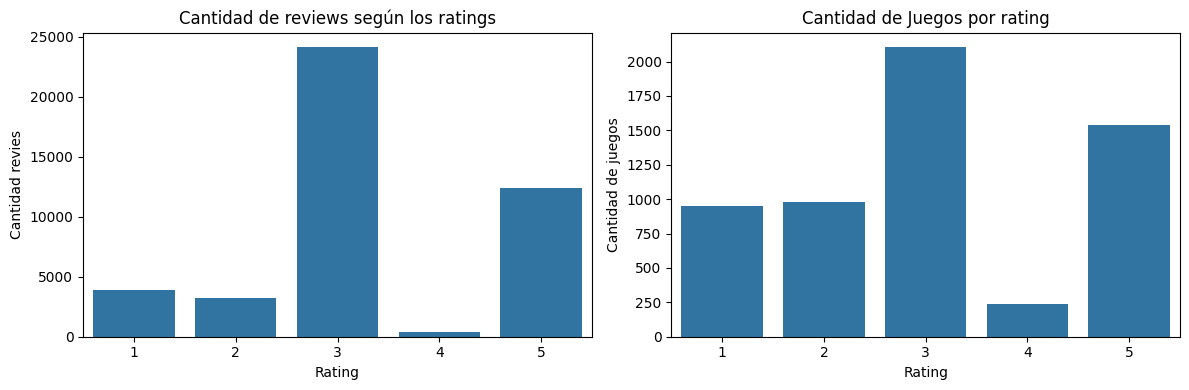

In [111]:
# Agrupa las calificaciones por rating
ratings_count = df['rating'].value_counts().reset_index()
ratings_count.columns = ['rating', 'count']
# Agrupa los juegos únicos por rating
unique_games_per_rating = df.groupby('rating')['item_name'].nunique().reset_index()

# Crea una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Primer subplot
sns.barplot(data=ratings_count, x='rating', y='count', ax=axes[0])
axes[0].set_title('Cantidad de reviews según los ratings') ; axes[0].set_xlabel('Rating') ; axes[0].set_ylabel('Cantidad revies')

# Segundo subplot
sns.barplot(data=unique_games_per_rating, x='rating', y='item_name', ax=axes[1])
axes[1].set_title('Cantidad de Juegos por rating') ; axes[1].set_xlabel('Rating') ; axes[1].set_ylabel('Cantidad de juegos')

# Ajusta y muestra los graficos
plt.tight_layout()
plt.show()

In [113]:
def resumen_cant_porcentaje(df, columna):
    '''
    Cuanta la cantidad de True/False luego calcula el porcentaje.

    Parameters:
    - df (DataFrame): El DataFrame que contiene los datos.
    - columna (str): El nombre de la columna en el DataFrame para la cual se desea generar el resumen.

    Returns:
    DataFrame: Un DataFrame que resume la cantidad y el porcentaje de True/False en la columna especificada.
    '''
    # Cuanta la cantidad de True/False luego calcula el porcentaje
    counts = df[columna].value_counts()
    percentages = round(100 * counts / len(df),2)
    # Crea un dataframe con el resumen
    df = pd.DataFrame({
        "Cantidad": counts,
        "Porcentaje": percentages
    })
    return df

In [115]:
# Cantidades de review por rating
resumen_cant_porcentaje(df, 'rating')

,Cantidad,Porcentaje
rating,,
3,24104,54.66
5,12408,28.14
1,3904,8.85
2,3252,7.37
4,430,0.98


In [116]:
# Cantidades de juegos por rating
unique_games_per_rating

,rating,item_name
0,1,953
1,2,980
2,3,2104
3,4,240
4,5,1537


Se puede ver en la gráfica de la derecha que la mayoría de las reviews tienen un 'rating' de 3, correspondiente a sentimientos neutrales pero que recomiendan el juego, siendo 24104 reviews (el 54% de los comentarios) en esta categoría. Le siguen 12408 reviews con sentimientos positivos y que recomiendan los juegos comentados. Finalmente, se observan menos de 6000 comentarios con sentimiento negativo. Por otro lado, en la gráfica de la izquierda se pueden observa cerca de 1800 juegos recomendados.

Finalmente, se guarda el dataframe a utilizar en el modelo de recomnedación.

In [117]:
df.to_parquet('EDA_df_recomendacion.parquet', index=False)